# Introduction to Python for Excel Experts

## Comments
Comments allow us to explain what code is doing, when it isn't clear. 

Just write a # sign. Everything on the same line after the # will be ignored when the code is run.

In [121]:
# This is a comment
print(1 + 2) # This is a comment on the same line as some code

3


### Add new functionality with libraries
Python allows us to add new functions by importing external libraries.

In [125]:
import pandas as pd     # Pandas lets us work easily with numbers and tables

import xlrd     # for importing and exporting Excel files

import matplotlib   # for creating graphs

## Using variables

In Python, using variables is simple, (unlike VBA) there is no need to define them at the start of the code, and no need to set the data type.

Just write something like this:

```python
top_speed_kmh = 75
```
All you need is:
1. a meaningful name for your variable:  __top_speed_kmh__
2. an equals sign: __=__ 
3. what you want to store in the variable (a number or text): __75__

In [1]:
# How to store a number in a variable
top_speed_kmh = 32.7 

# Text works the same way, just put a quotation mark before and after
car_brand = "Ford"

## Working with text 
Pieces of text are called strings.
Strings are written with apostrophes or quotation marks:

```'This is a string'```  
```"This is also a string"```

## Output to the screen with print()

To output to the screen, use ```print()```  

Either with a text string directly:

In [2]:
print("Welcome to the world of Python programming!")

Welcome to the world of Python programming!


Or with a variable name, to see what is stored in that variable:

In [3]:
print(car_brand)

Ford


Or both:

In [ ]:
print(car_brand + " is a car brand")

### Joining text together (Excel: CONCAT, VERKETTEN)
To concatenate text in Excel you would use something like ``` =CONCAT(A2;" ";B2) ```

In Python you just use + signs between strings

In [ ]:
car_brand = "Ford"
car_model = "Model T"

full_car_name = car_brand + " " + car_model

print(full_car_name)

To include numbers, convert them into strings using the str() function:  

for example
```str(top_speed_kmh)```

In [ ]:
top_speed_text = "The " + car_model + " has a top speed of " + str(top_speed_kmh) + " km/h"

print(top_speed_text)

## Mathematical functions

Just like in Excel, basic mathematics uses these symbols: + - / * 

In [4]:
print(10 + 2)

12


In [ ]:
start_position = 12.1
end_position = 22
time = 51

# speed = distance / time
speed = (end_position - start_position) / time

print(speed)

Powers are slightly different to Excel.

In Python we use ```**``` for powers, so 5² is 5**2

*(Careful: 5^2 will still give a result in Python, but the wrong result!)*

In [7]:
# this gives a surprising result
print(5^2)

7


In [8]:
# Calculating the area of a square

width = 5 

area = width**2

print(area)

25


### Rounding numbers

Round 
Rounding with round() in Python rounds towards the nearest even number 

In [10]:
print(round(2.5))

2


In [11]:
print(round(1.5))

2


In [12]:
print(round(0.5))

0


In [9]:


# To 3 decimal places
print(round(2.665, 3))
 
# when the (ndigit+1)th digit is >=5
print(round(2.676, 2))
 
# when the (ndigit+1)th digit is <5
print(round(2.673, 1))

2.665
2.68
2.7


#### Ceiling, floor

In [139]:
import math

math.ceil(-0.5)

0

### If statements (Excel: IF, WENN)

In Excel, we have:  
```
=IF((test); (result if true); (result if false))
```
```
=IF(A1 < 50; "Slow"; "Fast")
```

In Python we have:

```
if (test):
    (result if true)
else:
    (result if false)
```

For example:

In [ ]:
if top_speed_kmh < 50:
    slow_or_fast = "Slow"
else:
    slow_or_fast = "Fast"

print(slow_or_fast)

### Symbols used for logical comparisons

| Comparison            | Excel | Python |                                                  |
|-----------------------|-------|--------|--------------------------------------------------|
| equal to              | =     | ==     | The single = sign is used for setting variables |
| not equal to          | <>    | !=     | <> also works in Python                          |
| less than             | <     | <      |                                                  |
| less than or equal to | <=    | <=     |                                                  |
| greater than             | >     | <      |                                                  |
| greater than or equal to | >=    | >=     |                                                  |
  
You can combine multiple conditions using:

```and```  
```or```   
```not``` 

Here is another if statement, using multiple conditions this time:

In [ ]:
country = "DE"
age = 18

if (country == "US" and age>=21) or (country != "US" and age >= 18):
    print("This person can legally drink alcohol!")
else:
    print("You are either too young or in the wrong country!")


### Elif: say goodbye to nested "if" statements

elif means "else if", and is like using multiple if statements.

Maybe you know the horror of managing multiple nested IF statements in Excel: 
Here we test the top speed of a car to put it in a speed category.

```=IF(A1 <= 0; "not a car";IF(A1 < 50; "slow"; IF(A1 <= 100; "medium"; IF(A1 > 100; "fast"; ""))))```

Here is something similar in Python:

In [ ]:
# When you run this code, an input box will appear on your screen

car_speed = int(input('Enter the speed of a car in km/h: ')) 

if car_speed < 0:
    print('So, this car can only travel backwards?')
elif car_speed == 0:
    print('So, this car does not move? Maybe it is not a car.')
elif car_speed >= 100:
    print('Fast')
elif car_speed >= 50:
    print('Medium')
else:
    print('Slow')

# Working with tables of data

In Excel, you often create a formula and then clone it to each cell going down the table.

In Python, the Pandas library lets you make changes to entire columns of data with just one line of code.

This lets us work with large data sets in a practical way, as manual editing is avoided. We can use Python to combine, transform, filter and summarize data, and then still have the option of saving the final transformed data as an Excel file.

- XLS sheets are limited to 65536 rows, 256 columns (not enough rows for many uses)
- XLSX sheets are limited to around 1 million rows and 16,000 columns (navigate around your sheet until the end of time!)  
- Pandas DataFrames (tables) have no size limit, just the amount of memory in your computer.

## Loading Data from an Excel File

We will now look at importing data from an Excel file, and later on we will modify it and then save it into a new Excel file.

In [15]:
# Import the Pandas library, a Python package which simplifies data analysis and transformation
import pandas as pd

In [ ]:
# Floats (decimal numbers) can be displayed rounded with 2 decimal places (this does not modify the data itself)
pd.options.display.float_format = "{:,.2f}".format

In [17]:
# Import your data to a DataFrame format
superstore = pd.read_excel("data/Sample - Superstore.xls")

### Our table of data is stored in special type of variable called a 'DataFrame'

Because our data came from a retail chain called Superstore, we have used the variable name "superstore" for the dataframe.

By writing the name of the dataframe and dot, e.g. ```superstore.```
followed by various different keywords. e.g. ```head()```  
we can:
- get information about our data
- perform actions on our data

### Taking a look at a few rows - .head()

In [107]:
# Using .head(3) the first 3 rows of your dataframe get displayed
superstore.head(3)

,Row ID,Order ID,Order Date,Customer ID,Customer Name,Segment,Country/Region,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2020-152156,2020-11-08,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2020-152156,2020-11-08,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2020-138688,2020-06-12,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


### How large is the table? .shape

In [114]:
# use the '.shape' attribute to see the number of rows and columns
superstore.shape

(9994, 19)

Our dataframe consists of 21 columns and 9994 rows.

### Getting a statistical summary for each column - describe()

In [110]:
# the function '.describe' gives you a good overview of the descriptive stats of your numeric columns
superstore.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9983.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55245.233297,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32038.715955,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,57103.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### Getting a list of unique values (like 'Remove Duplicates' in Excel)

In [111]:
# use '.unique' on the Category column to get an overview of your unique product categories
superstore['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

## Data wrangling

### Add/remove columns

In [18]:
# Replace the superstore dataframe with a new version where selected columns have been removed with drop()
superstore = superstore.drop(['Ship Date','Ship Mode'], axis=1)

In [112]:
superstore.head()

,Row ID,Order ID,Order Date,Customer ID,Customer Name,Segment,Country/Region,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2020-152156,2020-11-08,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2020-152156,2020-11-08,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2020-138688,2020-06-12,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2019-108966,2019-10-11,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2019-108966,2019-10-11,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [26]:
# Create a new dataframe, reduced to a selection of columns

customer_locations = superstore[['Order ID','Customer ID','Country/Region','City']]

In [27]:
customer_locations.head()

,Order ID,Customer ID,Country/Region,City
0,CA-2020-152156,CG-12520,United States,Henderson
1,CA-2020-152156,CG-12520,United States,Henderson
2,CA-2020-138688,DV-13045,United States,Los Angeles
3,US-2019-108966,SO-20335,United States,Fort Lauderdale
4,US-2019-108966,SO-20335,United States,Fort Lauderdale


### Perform columnwise calculations

#### SUM()

Summing a column

In [ ]:
superstore[['Sales']].sum()

Sales    2.297201e+06
dtype: float64

#### MAX(), MIN()

In [ ]:
superstore[['Sales']].max()

Sales    0.444
dtype: float64

## Sorting data

In [138]:
# Finding our top 3 sales
superstore.sort_values(by='Sales', ascending=False).head(3)

,Row ID,Order ID,Order Date,Customer ID,Customer Name,Segment,Country/Region,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2697,2698,CA-2018-145317,2018-03-18,SM-20320,Sean Miller,Home Office,United States,Jacksonville,Florida,32216.0,South,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.48,6,0.5,-1811.0784
6826,6827,CA-2020-118689,2020-10-02,TC-20980,Tamara Chand,Corporate,United States,Lafayette,Indiana,47905.0,Central,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.95,5,0.0,8399.9760
8153,8154,CA-2021-140151,2021-03-23,RB-19360,Raymond Buch,Consumer,United States,Seattle,Washington,98115.0,West,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.96,4,0.0,6719.9808


### Filtering

#### Basic filtering

In [105]:

superstore[(superstore['State'] == 'Florida')].head()

,Row ID,Order ID,Order Date,Customer ID,Customer Name,Segment,Country/Region,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3,4,US-2019-108966,2019-10-11,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2019-108966,2019-10-11,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
43,44,CA-2021-139619,2021-09-19,ES-14080,Erin Smith,Corporate,United States,Melbourne,Florida,32935.0,South,OFF-ST-10003282,Office Supplies,Storage,"Advantus 10-Drawer Portable Organizer, Chrome ...",95.6160,2,0.20,9.5616
231,232,US-2021-100930,2021-04-07,CS-12400,Christopher Schild,Home Office,United States,Tampa,Florida,33614.0,South,FUR-TA-10001705,Furniture,Tables,Bush Advantage Collection Round Conference Table,233.8600,2,0.45,-102.0480
232,233,US-2021-100930,2021-04-07,CS-12400,Christopher Schild,Home Office,United States,Tampa,Florida,33614.0,South,FUR-TA-10003473,Furniture,Tables,Bretford Rectangular Conference Table Tops,620.6145,3,0.45,-248.2458


#### Filtering based on multiple conditions

In [106]:
superstore[(superstore['State'] == 'Florida') & (superstore['Discount'] > 0.6) & (superstore['Profit'] < 0)].head()

,Row ID,Order ID,Order Date,Customer ID,Customer Name,Segment,Country/Region,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
233,234,US-2021-100930,2021-04-07,CS-12400,Christopher Schild,Home Office,United States,Tampa,Florida,33614.0,South,OFF-BI-10001679,Office Supplies,Binders,GBC Instant Index System for Binding Systems,5.328,2,0.7,-3.5520
286,287,CA-2020-112697,2020-12-18,AH-10195,Alan Haines,Corporate,United States,Tamarac,Florida,33319.0,South,OFF-BI-10000778,Office Supplies,Binders,GBC VeloBinder Electric Binding Machine,254.058,7,0.7,-169.3720
434,435,US-2018-150574,2018-12-19,MK-18160,Mike Kennedy,Consumer,United States,Jacksonville,Florida,32216.0,South,OFF-BI-10000773,Office Supplies,Binders,Insertable Tab Post Binder Dividers,4.812,2,0.7,-3.6892
604,605,CA-2018-149958,2018-03-15,AS-10240,Alan Shonely,Consumer,United States,Tampa,Florida,33614.0,South,OFF-BI-10000773,Office Supplies,Binders,Insertable Tab Post Binder Dividers,7.218,3,0.7,-5.5338
605,606,CA-2018-149958,2018-03-15,AS-10240,Alan Shonely,Consumer,United States,Tampa,Florida,33614.0,South,OFF-BI-10001543,Office Supplies,Binders,GBC VeloBinder Manual Binding System,43.188,4,0.7,-31.6712


## Pivot Tables

In [141]:
pivot_sales_by_date = pd.pivot_table(
    data = superstore, # The dataframe to pivot
    index = ['Order Date'], # Choose the columns to group by
    values = ['Sales'], # Choose the values to aggregate/summarize
    aggfunc = 'sum', # Choose the type of aggregation: 'sum', 'mean', 'max', 'min', etc..
)

pivot_sales_by_date.head()

,Sales
Order Date,
2018-01-03,16.448
2018-01-04,288.060
2018-01-05,19.536
2018-01-06,4407.100
2018-01-07,87.158


In [64]:
pivot_category_sales = pd.pivot_table(
    data = superstore, # The dataframe to pivot
    index = ['Category','Sub-Category'], # Choose the columns to group by
    values = ['Sales','Quantity'], # Choose the values to aggregate/summarize
    aggfunc = 'max', # Choose the type of aggregation: 'sum', 'mean', 'max', 'min', etc..
)

print(pivot_category_sales)

                              Quantity      Sales
Category        Sub-Category                     
Furniture       Bookcases           13   4404.900
                Chairs              14   4416.174
                Furnishings         14   1336.440
                Tables              13   4297.644
Office Supplies Appliances          14   2625.120
                Art                 14   1113.024
                Binders             14   9892.740
                Envelopes            9    604.656
                Fasteners           14     93.360
                Labels              14    786.480
                Paper               14    733.950
                Storage             14   2934.330
                Supplies            10   8187.650
Technology      Accessories         14   3347.370
                Copiers              9  17499.950
                Machines            11  22638.480
                Phones              14   4548.810


In [134]:
pivot_category_sales = pd.pivot_table(
    data = superstore, # The dataframe to pivot
    index = 'State', # Choose the rows to group by
    columns = 'Category', # Choose the columns to group by
    values = 'Sales', # Choose the values to aggregate/summarize
    aggfunc = 'sum', # Choose the type of aggregation: 'sum', 'mean', 'max', 'min', etc..
    # margins = True # Adds totals
)

print(pivot_category_sales.head(15))

Category                Furniture  Office Supplies  Technology
State                                                         
Alabama                 6332.4800         4209.080    8969.080
Arizona                13525.2910        10005.825   11750.885
Arkansas                3187.5500         4565.330    3925.250
California            156064.6015       142351.948  159271.082
Colorado               13243.0370         7898.752   10966.329
Connecticut             5174.9870         5418.340    2791.030
Delaware                4759.3190         8129.530   14562.220
District of Columbia    1346.5800          138.520    1379.920
Florida                22987.0380        19518.634   46968.036
Georgia                 8321.4800        26715.810   14058.550
Idaho                   2595.4820          949.506     837.498
Illinois               28274.5220        19907.906   31983.673
Indiana                11496.7100        15735.400   26323.250
Iowa                    2642.3100          783.150    1

## Basic graphs

<AxesSubplot:xlabel='Order Date'>

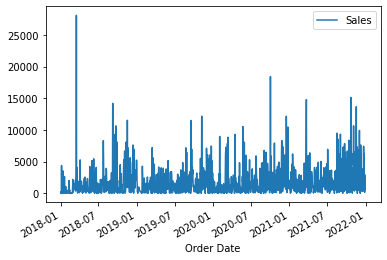

In [142]:
pivot_sales_by_date.plot()

<AxesSubplot:xlabel='State'>

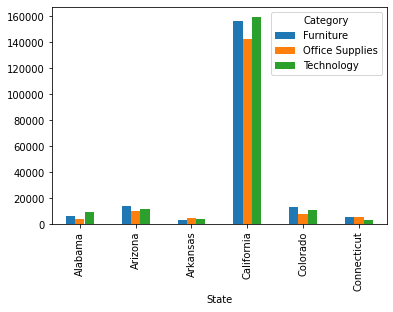

In [79]:
pivot_category_sales.head(6).plot.bar()

## Merge datasets

VLOOKUP()

## Export to Excel

In [135]:
# Creating an empty Excel file
from openpyxl import Workbook
wb = Workbook()
wb.save('data/demo_output_file.xlsx')

# Saving our pivot tables into it
with pd.ExcelWriter("data/demo_output_file.xlsx", mode="a", engine="openpyxl") as writer:
    pivot_category_sales.to_excel(writer, sheet_name="Sales by Category")
    pivot_sales_by_date.to_excel(writer, sheet_name="Sales by Date")